# Online Retail Analysis

Dans le présent notebook, nous allons réaliser une analyse du dataset 'Online Retail' afin d'en tirer des insights.

Il s'agit d'un ensemble de données contenant les transactions effectuées entre le 01/12/2010 et le 09/12/2011 pour une entreprise de vente en ligne basée au Royaume-Uni. Dont, l'activité principale est la vente des produits et cadeaux pour toutes les occasions. A savoir que la plupart des clients de l'entreprise sont des grossistes.

# EDA- Analyse exploratoire des données & Data preprocessing


In [208]:
#Import des librairies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
#Import du dataset
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

In [182]:
#Head of the dataset, les dix premières lignes
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Notre Dataset est composé de 541909 lignes et 8 colonnes.

In [183]:
#Nombres des lignes et colonnes du dataset
df.shape

(541909, 8)

Observons, maintenant, le type des différentes variables du dataset.

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Voici un aperçu des données quantitatives (Quantity & UnitPrice) de notre dataset.

In [211]:
#Description statistique du dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Il est intéressant de noter que nous avons quelques valeurs négatives dans notre dataset. Cela semble signifier que ces quantités ont été retournées ou annulées. (Idem pour les valeurs négatives de UnitPrice).

Comme indiqué dans la description du dataset, certains numéros de facture commencent par la lettre "c" = cancelled. 
Pour cela, vérifions la liste des factures annulées et la transaction ayant la quantité négative : -80995.

In [186]:
#Transactions annulées
commandes_annulees = df[df['InvoiceNo'].astype(str).str.contains('C')]
commandes_annulees.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [187]:
#Cherchons la transaction ayant une quantité négative == -80995
commandes_annulees[commandes_annulees['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [188]:
commandes_annulees[commandes_annulees['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Nous avons 9288 commandes annulées. L'étude de ces commandes annulées pourra nous aider à prévenir de futures annulations. Nous décidons de les garder.

In [189]:
print(len(commandes_annulees))

9288


Nous avons uniquement 2 valeures négatives des prix unitaires, que nous décidons de conserver. Vu qu'il s'agit d'une information importante qui concerne les clients insolvables.

In [212]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Nous avons 135080 valeures manquantes auprès de la variable 'CustomerID'.

In [213]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Observons les dix premières lignes de ces valeures manquantes.

In [192]:
df[df['CustomerID'].isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


Nous en disposons bien du numéro de facture, du code article, de la quantité vendu et du prix unitaire associés aux codes clients manquants. Cela dit que nous décidons de remplacer ces valeures manquantes par un code CustomerID égale à 1, nous permettant d'en tirer des insights significatifs lors des prochaines étapes de cette analyse et ce en utilisant la fonction fillna().

In [215]:
df.fillna({'CustomerID': 1},inplace=True)
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

Nous observons 5268 lignes dupliquées.

In [216]:
df.duplicated().sum()

5268

In [195]:
df[df.duplicated()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


On observe que le CustomerID 17908 dispose d'un seul numéro de facture 536409 pour une commande globale de 4 produits ayant respectivement les numéros d'articles 21866, 22866, 22900 et 22111. Cela dit que la suppression des lignes dupliquées éliminera ces produits de notre analyse, ce qui rend notre dataset obsolète.

Nous décidons de conserver les lignes dupliquées.

# Exploration des ventes par pays

Nous allons calculer les ventes réalisées en ajoutant la colonne 'Sales' comme suit:

In [219]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Ensuite, il est intéressant de tracer un bar chart des ventes réalisées pour chaque pays en utilisant la librairie seaborn et matplotlib.

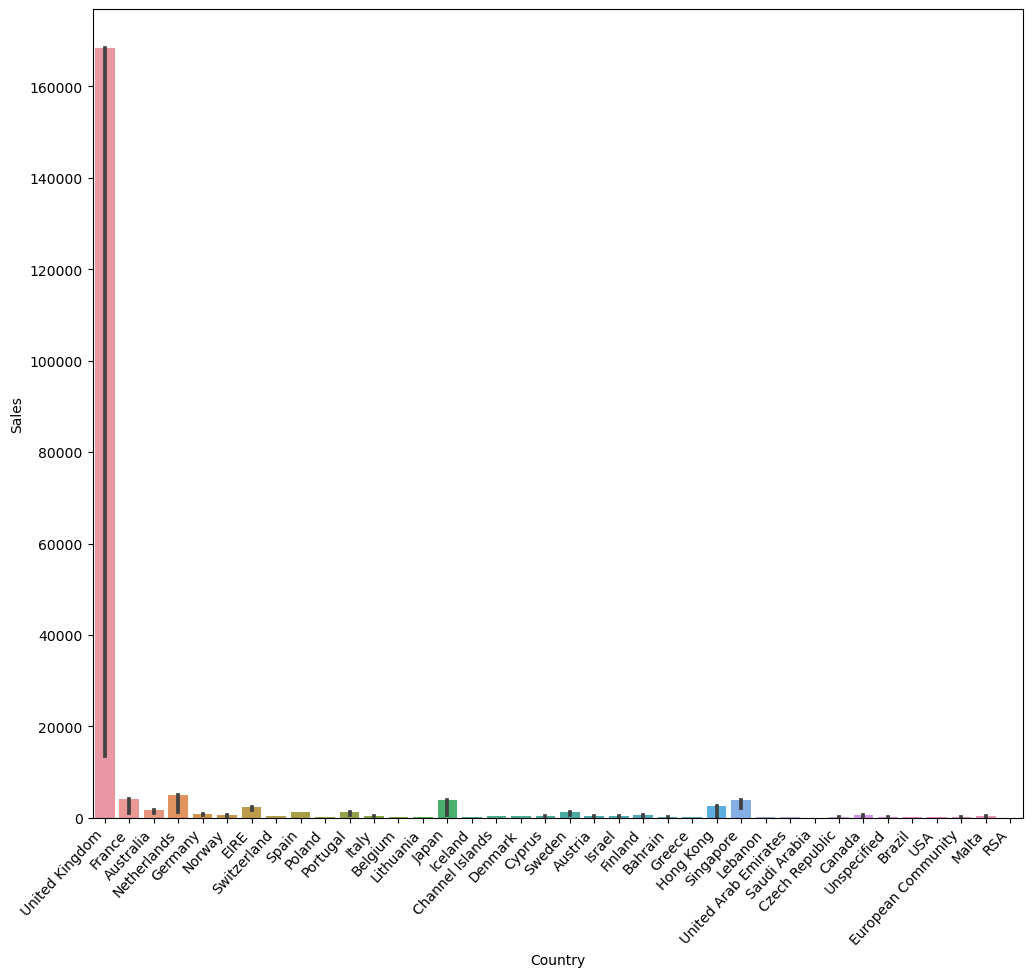

In [220]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10.5)
ax=sns.barplot(x='Country', y='Sales',data=df,estimator=max)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

Comme nous pouvons le constater, le plus important marché est celui du Royaume-Uni.

In [222]:
df.groupby('Country').sum().sort_values(by='Sales',ascending=False).head(10)

,Quantity,UnitPrice,CustomerID,Sales
Country,,,,
United Kingdom,4263829,2245715.474,5.626566e+09,8187806.364
Netherlands,200128,6492.550,3.419054e+07,284661.540
EIRE,142637,48447.190,1.103925e+08,263276.820
Germany,117448,37666.000,1.200751e+08,221698.210
France,110480,43031.990,1.076489e+08,197403.900
Australia,83653,4054.750,1.569300e+07,137077.270
Switzerland,30325,6813.690,2.377604e+07,56385.350
Spain,26824,12633.450,3.268929e+07,54774.580
Belgium,23152,7540.130,2.571829e+07,40910.960


In [199]:
df_uk = df[df['Country']=='United Kingdom']
df_uk.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,495478.000000,495478.000000,495478.000000,495478.000000
mean,8.605486,4.532422,11355.834558,16.525065
std,227.588756,99.315438,7032.541869,394.839116
min,-80995.000000,-11062.060000,1.000000,-168469.600000
25%,1.000000,1.250000,1.000000,3.290000
50%,3.000000,2.100000,14532.000000,8.290000
75%,10.000000,4.130000,16445.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [200]:
print("Nombre de transactions réalisées au Royaume Uni : ", df_uk['InvoiceNo'].nunique())
print("Nomnbre des produits vendus au Royaume Uni: ",df_uk['StockCode'].nunique())
print("Nombre des clients au Royaume Uni :", df_uk['CustomerID'].nunique() )

Nombre de transactions réalisées au Royaume Uni :  23494
Nomnbre des produits vendus au Royaume Uni:  4065
Nombre des clients au Royaume Uni : 3951


Nous pouvons donc conclure que non seulement la majeure partie du chiffre d'affaires est réalisée au Royaume-Uni, mais que la plupart des clients s'y trouvent également. 

# Exploration des produits vendus

Ci-après le top dix des produits les plus achetés auprès de la dite entreprise.

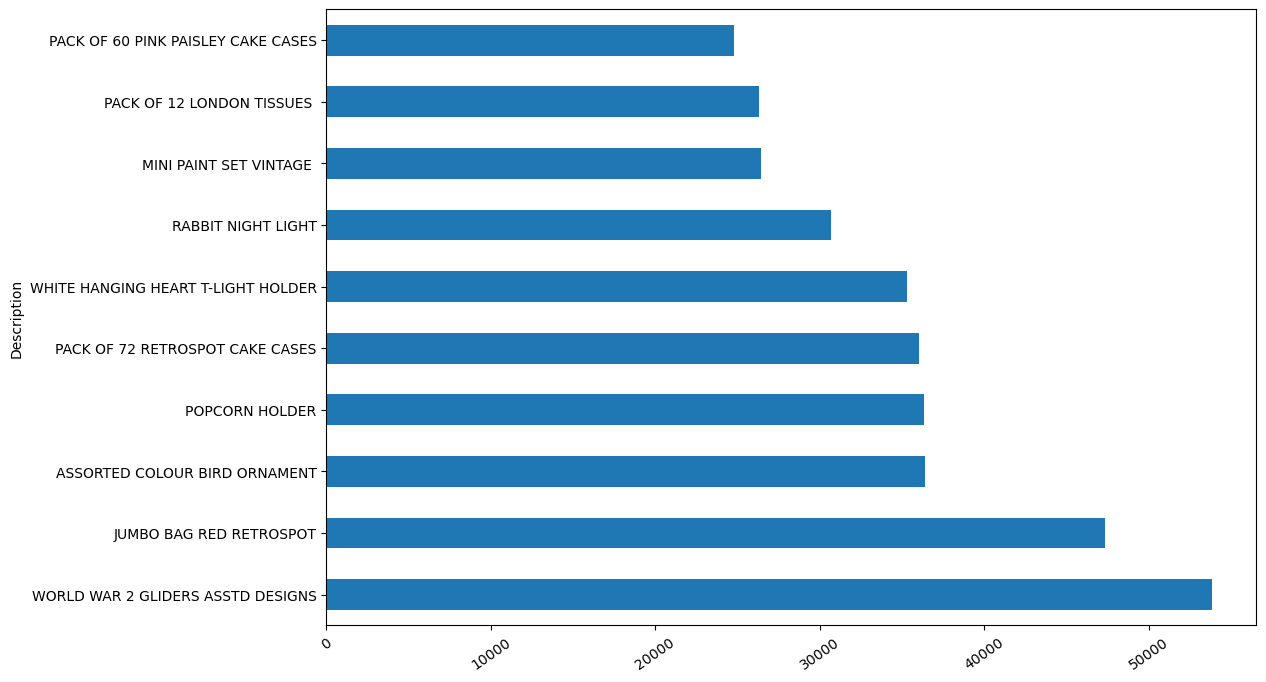

In [201]:
df_items = df.groupby('Description').sum()
df_items = df_items.sort_values('Quantity',ascending=False).head(10)
df_items['Quantity'].plot(kind = 'barh',figsize=(12,8))
plt.xticks(rotation=35)
plt.show()

Il est également intéressant d'avoir le top dix des produits les plus achetés dans le marché britannique.

In [223]:
df_items_uk = df_uk.groupby('Description',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
df_items_uk.head(10)

,Description,Quantity
3988,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326
1858,JUMBO BAG RED RETROSPOT,43167
2725,POPCORN HOLDER,34365
242,ASSORTED COLOUR BIRD ORNAMENT,33679
3898,WHITE HANGING HEART T-LIGHT HOLDER,33193
2350,PACK OF 12 LONDON TISSUES,25307
2384,PACK OF 72 RETROSPOT CAKE CASES,24702
3728,VICTORIAN GLASS HANGING T-LIGHT,23242
584,BROCADE RING PURSE,22801
250,ASSORTED COLOURS SILK FAN,20322


# Exploration des clients

Observons, maintenant, le classement des dix clients ayant acheté le plus.

In [225]:
df.groupby('CustomerID').sum().sort_values(by='Sales',ascending=False).head(10)

,Quantity,UnitPrice,Sales
CustomerID,,,
1.0,269562,1090984.01,1447682.12
14646.0,196719,5400.21,279489.02
18102.0,64122,5159.73,256438.49
17450.0,69029,3320.09,187482.17
14911.0,77180,31060.66,132572.62
12415.0,77242,2499.82,123725.45
14156.0,57025,6544.29,113384.14
17511.0,63012,2607.08,88125.38
16684.0,49390,709.93,65892.08


Il est intéressant de connaître le pays des dix meilleurs CustomerID ayant acheté le plus.

In [226]:
df_clients= df.groupby(['Country','CustomerID']).sum() 
df_clients.sort_values('Sales',ascending=False).head(10)

Quantity   UnitPrice       Sales
Country        CustomerID                                  
United Kingdom 1.0           255296  1067438.21  1419932.97
Netherlands    14646.0       196719     5400.21   279489.02
United Kingdom 18102.0        64122     5159.73   256438.49
               17450.0        69029     3320.09   187482.17
EIRE           14911.0        77180    31060.66   132572.62
Australia      12415.0        77242     2499.82   123725.45
EIRE           14156.0        57025     6544.29   113384.14
United Kingdom 17511.0        63012     2607.08    88125.38
               16684.0        49390      709.93    65892.08
               13694.0        61803     1163.81    62653.10

# Evolution des ventes par mois

Nous allons remplacer le type datetime de la colonne 'InvoiceDate' au format date dans une nouvelle colonne appelée 'Month'. Afin de nous permettre de tracer l'évolution des ventes par mois. 

In [230]:
df['Month']= df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


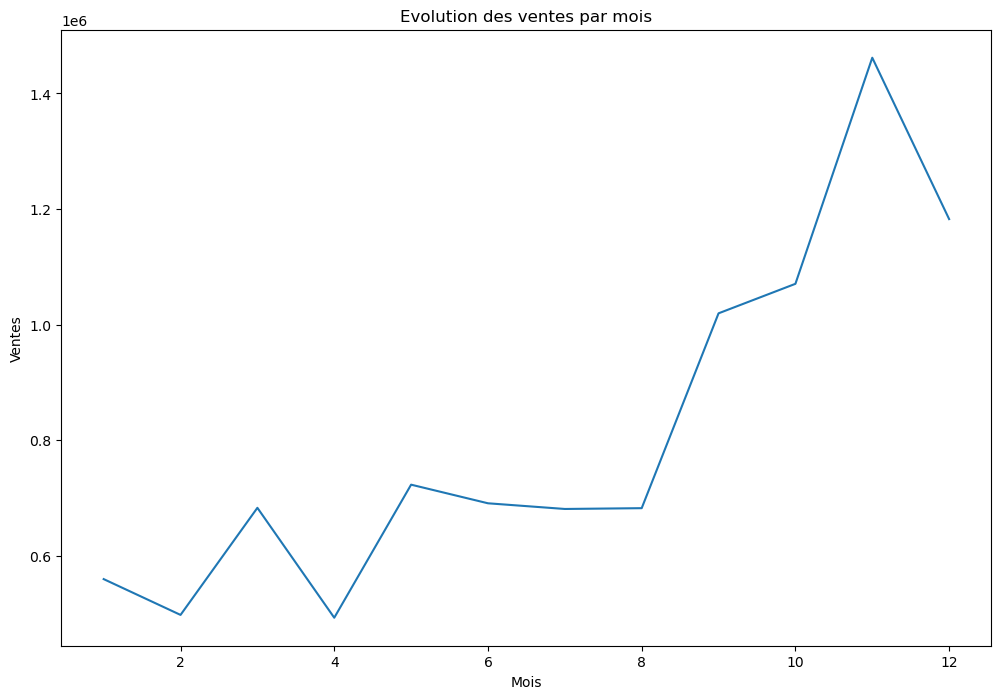

In [231]:
df_month = df.groupby(by=['Month']).sum()['Sales']\
.plot(kind='line',figsize=(12,8))
plt.title('Evolution des ventes par mois')
plt.ylabel('Ventes')
plt.xlabel('Mois')
plt.show()

A la base des informations publiées par l'UCI sur ce dataset, l'entreprise vend principalement des produits et cadeaux pour toutes les occasions. En se basant sur le graphe ci-dessus, nous pouvons confirmer que le meilleur mois en terme des ventes est le mois de novembre, durant les achats de noël.

In [234]:
df_ventes= df.groupby(['Description','Month']).sum() 
df_ventes.sort_values('Sales',ascending=False).head(20)

,,Quantity,UnitPrice,CustomerID,Sales
Description,Month,,,,
DOTCOM POSTAGE,12,71,44543.88,14166.0,44543.88
PICNIC BASKET WICKER 60 PIECES,6,61,1299.00,30196.0,39619.50
DOTCOM POSTAGE,11,47,36905.40,56427.0,36905.40
RABBIT NIGHT LIGHT,11,14883,1156.97,7033995.0,34422.09
REGENCY CAKESTAND 3 TIER,12,2456,3702.25,3112179.0,32800.28
PAPER CHAIN KIT 50'S CHRISTMAS,11,7868,1312.29,5551659.0,28883.04
PARTY BUNTING,5,3560,1412.28,3280749.0,19123.00
DOTCOM POSTAGE,10,43,17955.13,70518.0,17955.13
REGENCY CAKESTAND 3 TIER,3,1317,3079.38,2967963.0,16830.60


Nous pouvons conclure avec le top vingt des best sellers par mois.